In [2]:
import pandas as pd

df = pd.read_csv("/content/Standard Survival Data Format.csv")
df.head()


,Patient (i),Remission Time (t),Censoring (d),Group (X)
0,1,6,1,1
1,2,6,1,1
2,3,6,1,1
3,4,7,1,1
4,5,10,1,1


In [29]:
print("Number of rows, columns):", df.shape)


Number of rows, columns): (42, 4)


In [5]:
# Display the structure and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Count number of patients who relapsed (d=1) vs censored (d=0)
print("Censoring distribution:")
print(df["Censoring (d)"].value_counts())

# Count number of patients in each group
print("Group distribution:")
print(df["Group (X)"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Patient (i)         42 non-null     int64
 1   Remission Time (t)  42 non-null     int64
 2   Censoring (d)       42 non-null     int64
 3   Group (X)           42 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB
None
Patient (i)           0
Remission Time (t)    0
Censoring (d)         0
Group (X)             0
dtype: int64
Censoring distribution:
Censoring (d)
1    30
0    12
Name: count, dtype: int64
Group distribution:
Group (X)
1    21
2    21
Name: count, dtype: int64


In [8]:
df.describe().round(2)


,Patient (i),Remission Time (t),Censoring (d),Group (X)
count,42.00,42.00,42.00,42.00
mean,21.50,12.88,0.71,1.50
std,12.27,9.35,0.46,0.51
min,1.00,1.00,0.00,1.00
25%,11.25,6.00,0.00,1.00
50%,21.50,10.50,1.00,1.50
75%,31.75,18.50,1.00,2.00
max,42.00,35.00,1.00,2.00


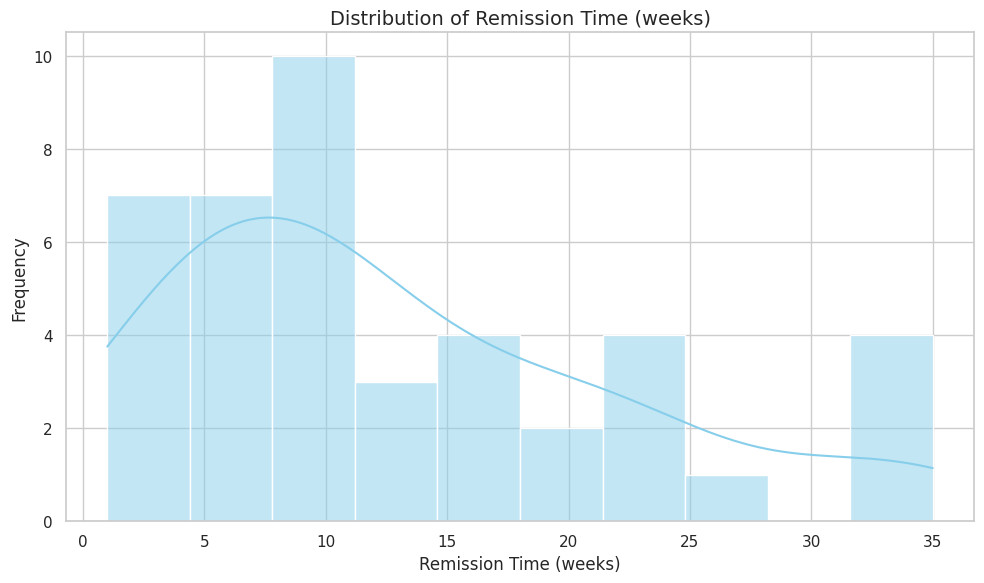

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plotting the distribution of Remission Time
plt.figure(figsize=(10, 6))
sns.histplot(df["Remission Time (t)"], kde=True, bins=10, color="skyblue")

plt.title("Distribution of Remission Time (weeks)", fontsize=14)
plt.xlabel("Remission Time (weeks)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


In [7]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=698e65ee4f8a6cdae9542a1fae256760dc2597dcc2e27c0b0f267ac2b64ab03b
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [11]:
from lifelines.statistics import logrank_test

# Separating the data by groups
group1 = df[df["Group (X)"] == 1]
group2 = df[df["Group (X)"] == 2]

# Running the log-rank test
results = logrank_test(
    group1["Remission Time (t)"],
    group2["Remission Time (t)"],
    event_observed_A=group1["Censoring (d)"],
    event_observed_B=group2["Censoring (d)"]
)

# Display the p-value
print("Log-rank test p-value:", round(results.p_value, 4))

# Optional: summary
results.print_summary()


Log-rank test p-value: 0.0


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

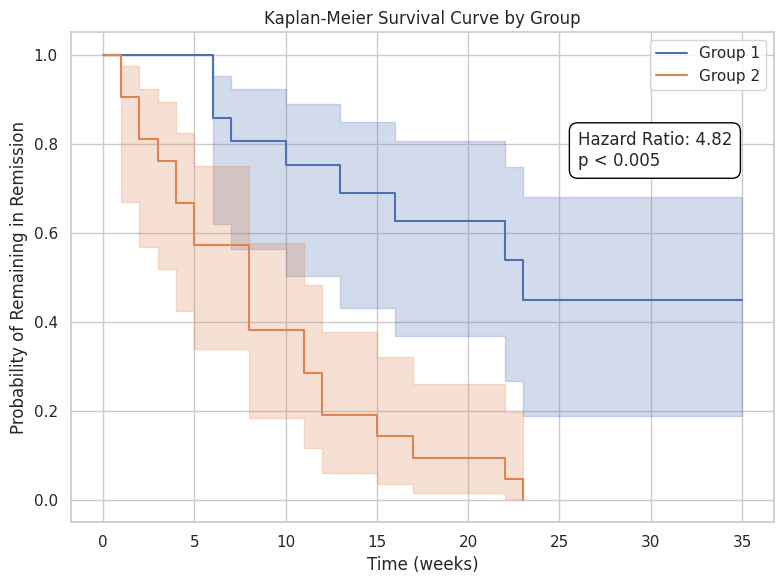

In [30]:

df = pd.read_csv("Standard Survival Data Format.csv")
df.columns = ['Patient', 'Time', 'Event', 'Group']

#Dividing the Groups
group1 = df[df['Group'] == 1]
group2 = df[df['Group'] == 2]

kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

plt.figure(figsize=(8, 6))

kmf1.fit(group1["Time"], group1["Event"], label="Group 1")
ax = kmf1.plot(ci_show=True)

kmf2.fit(group2["Time"], group2["Event"], label="Group 2")
kmf2.plot(ax=ax, ci_show=True)

plt.text(
     26, 0.75,
    "Hazard Ratio: 4.82\np < 0.005",
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.title("Kaplan-Meier Survival Curve by Group")
plt.xlabel("Time (weeks)")
plt.ylabel("Probability of Remaining in Remission")
plt.grid(True)
plt.tight_layout()
plt.show()
